Data minima : 2019-01-01
Data maxima : 2019-12-31
2019-12
Data minima : 2019-01-01
Data maxima : 2019-12-31
2019-12
Data minima : 2019-01-01
Data maxima : 2019-12-31
2019-12


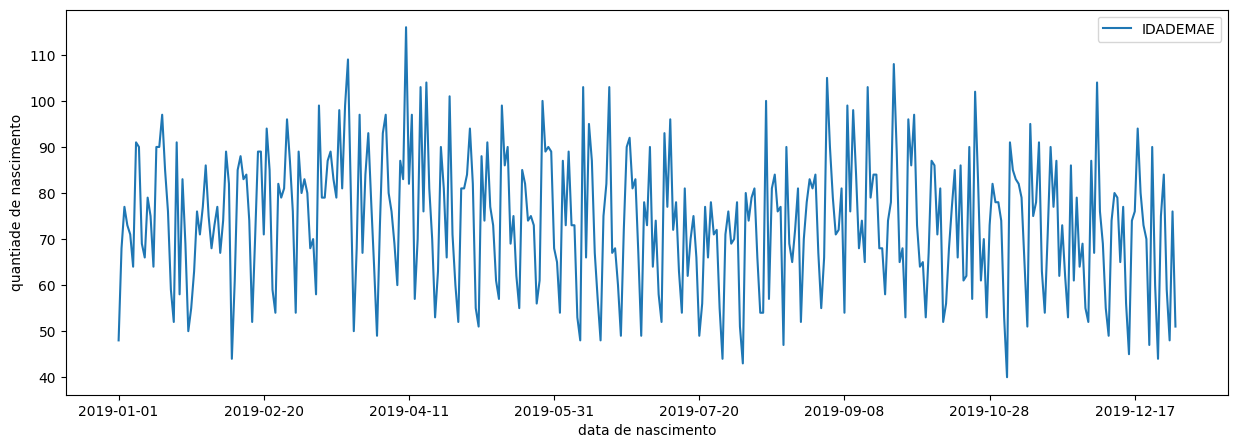

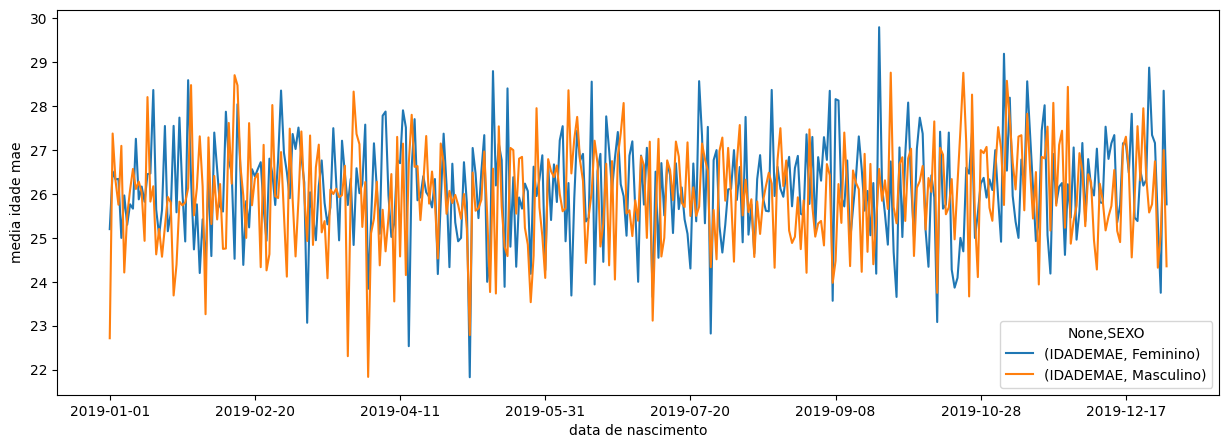

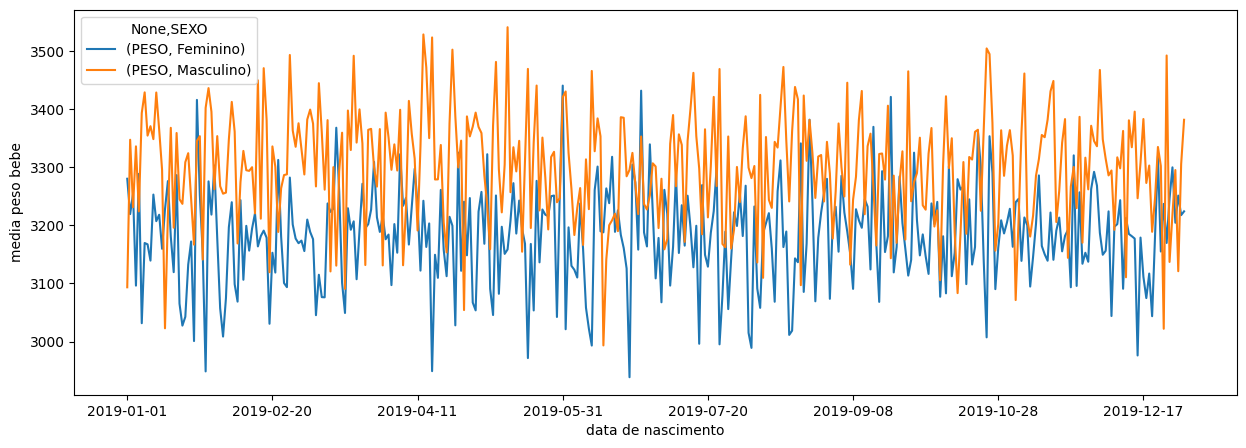

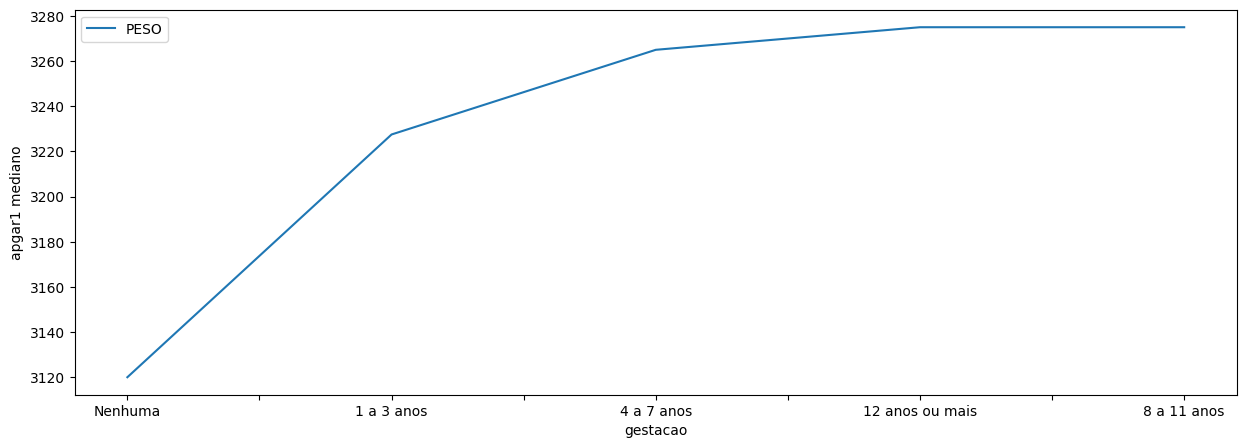

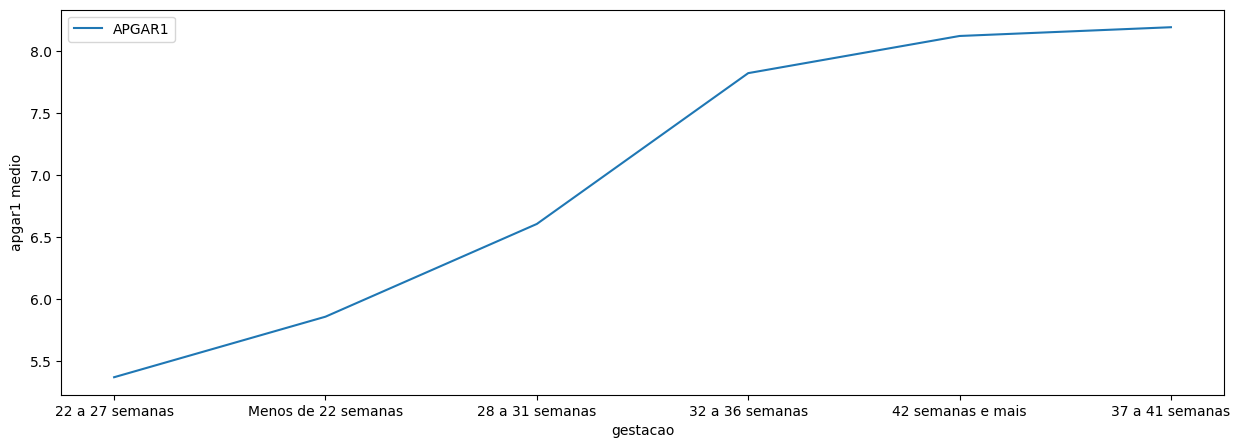

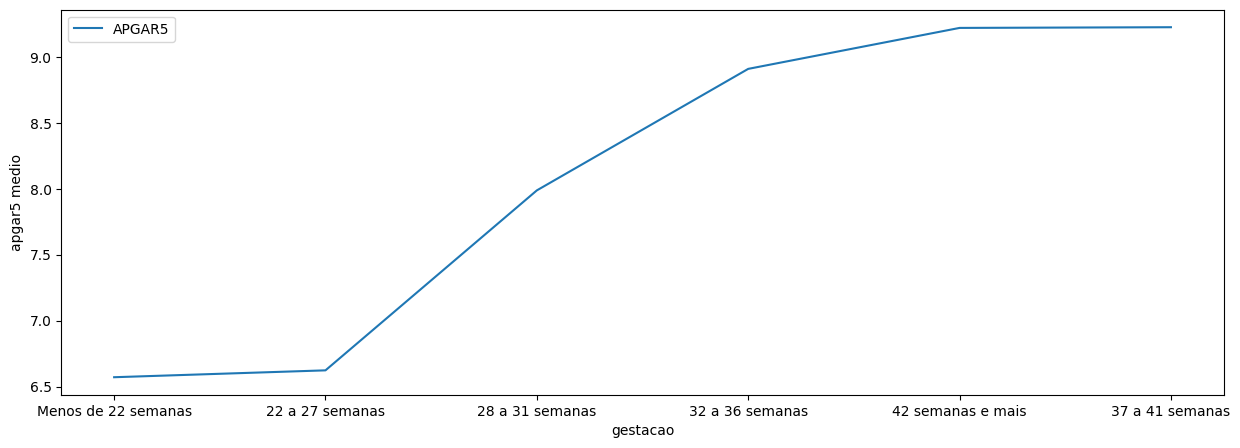

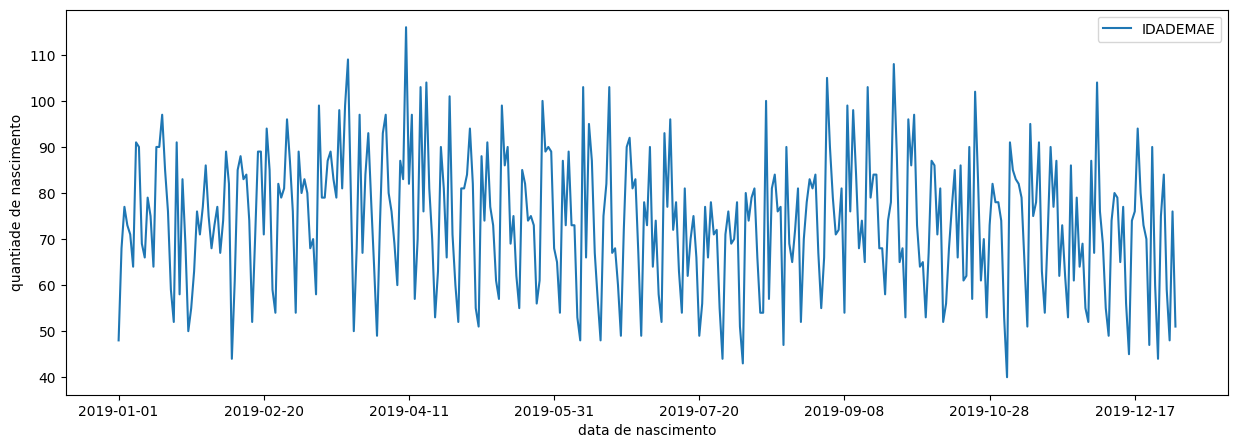

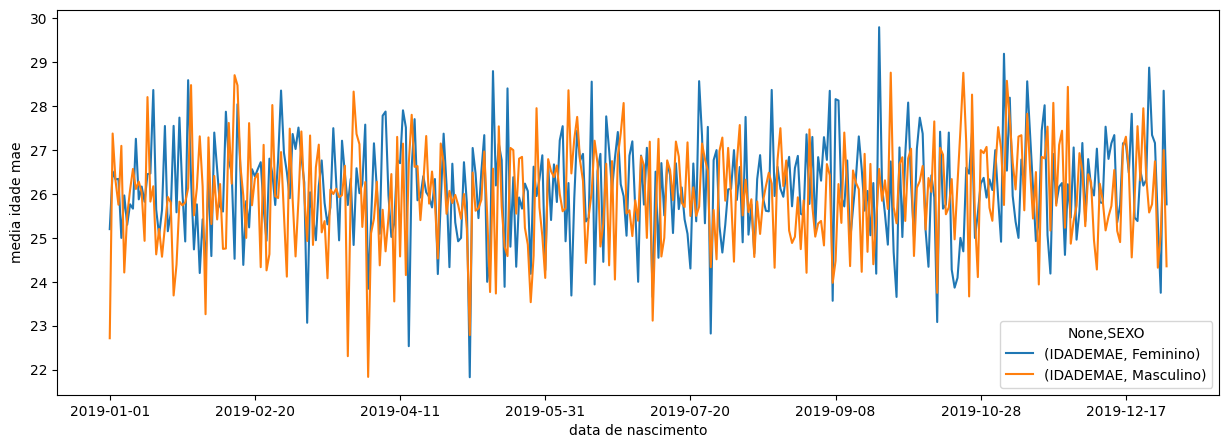

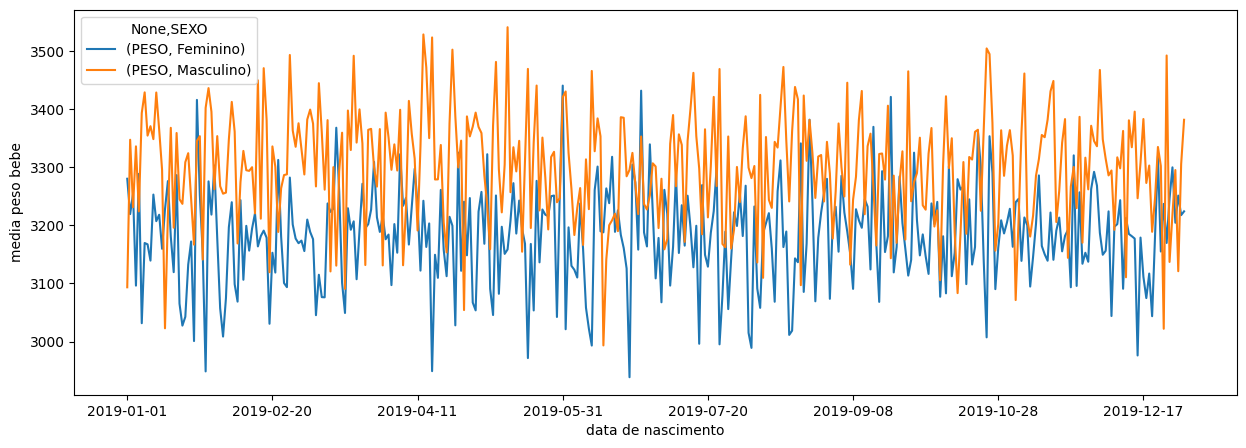

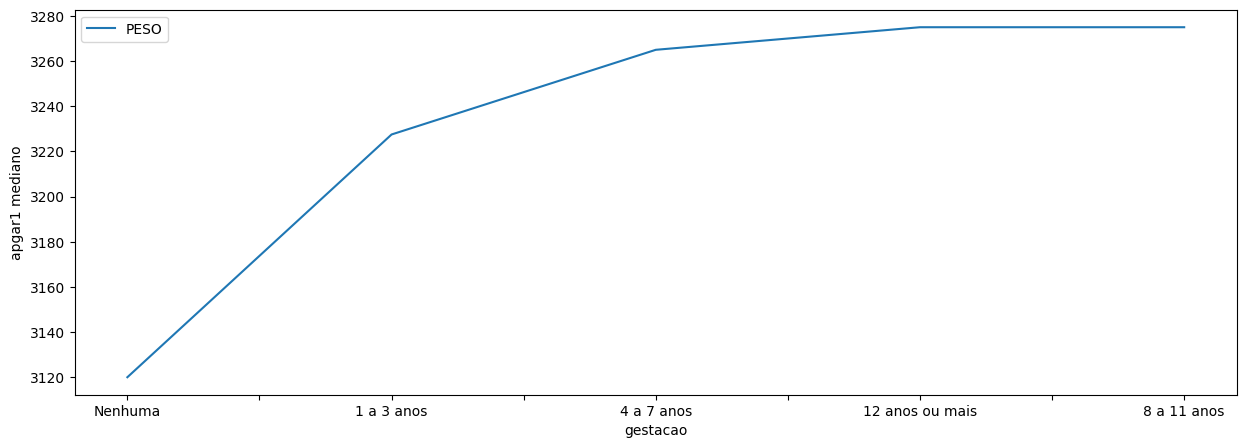

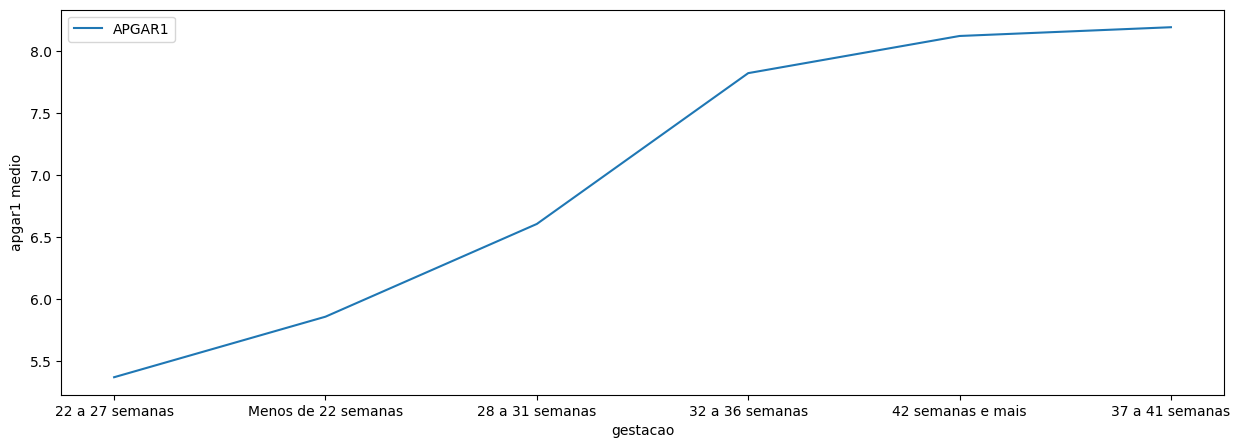

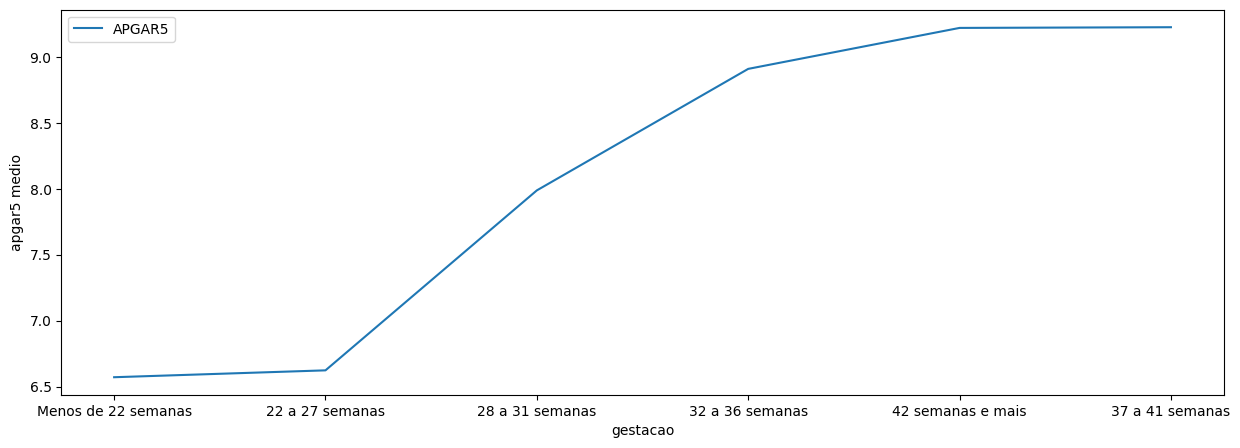

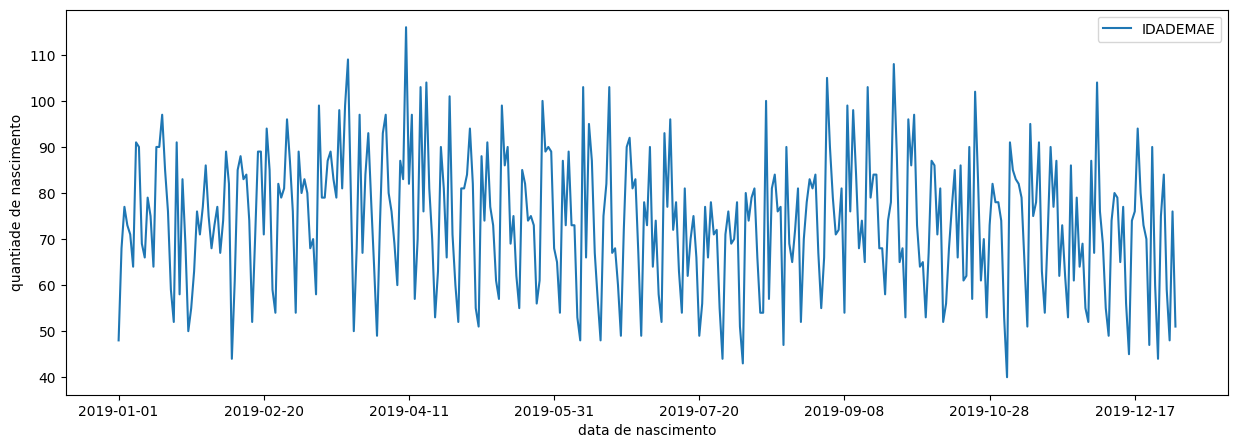

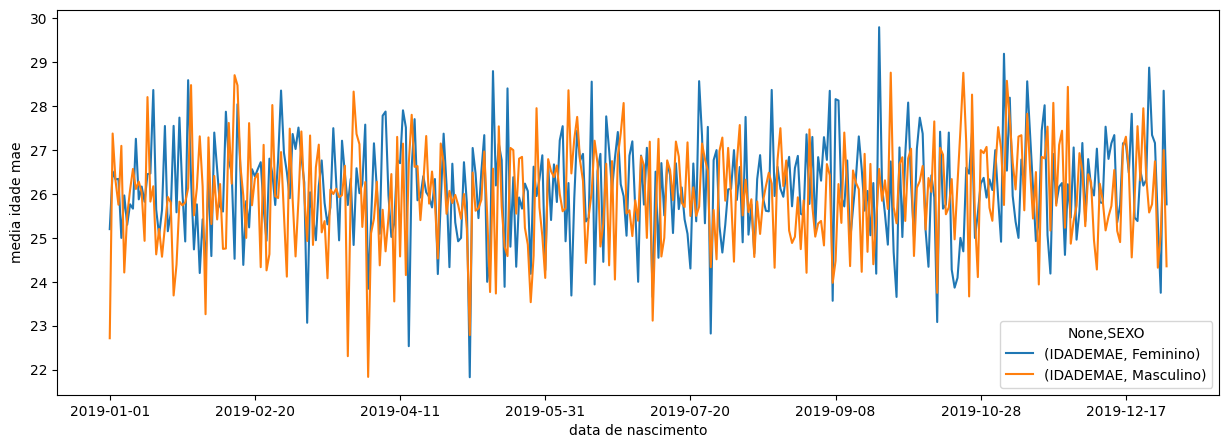

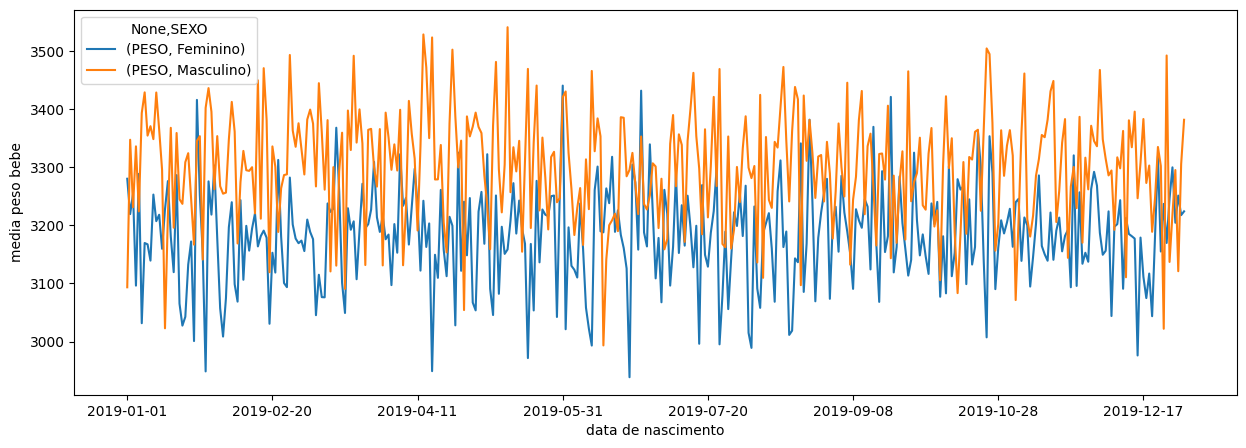

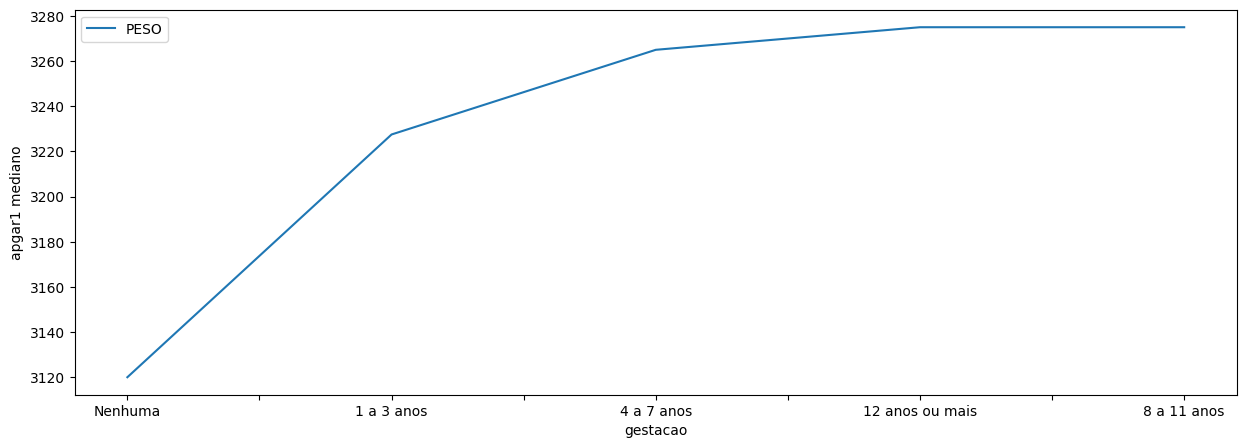

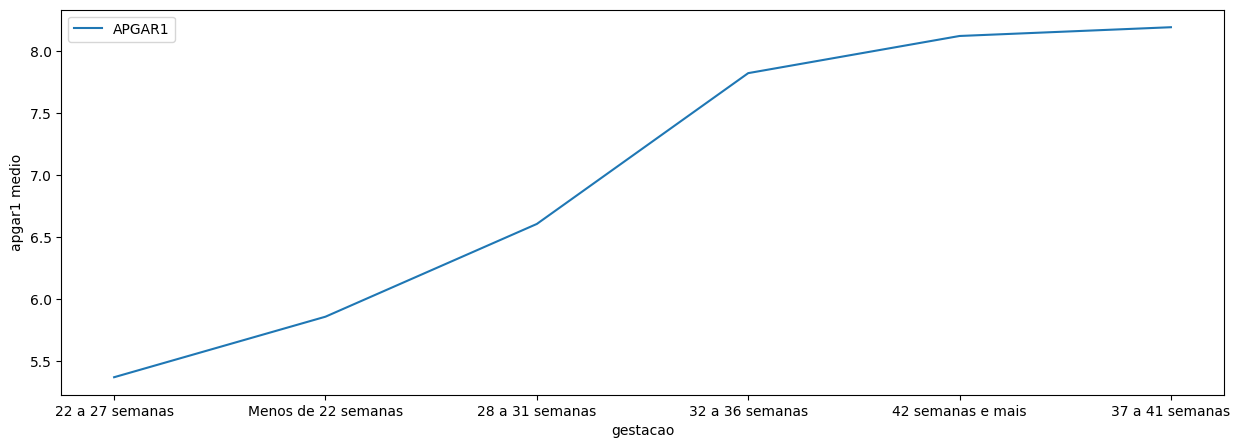

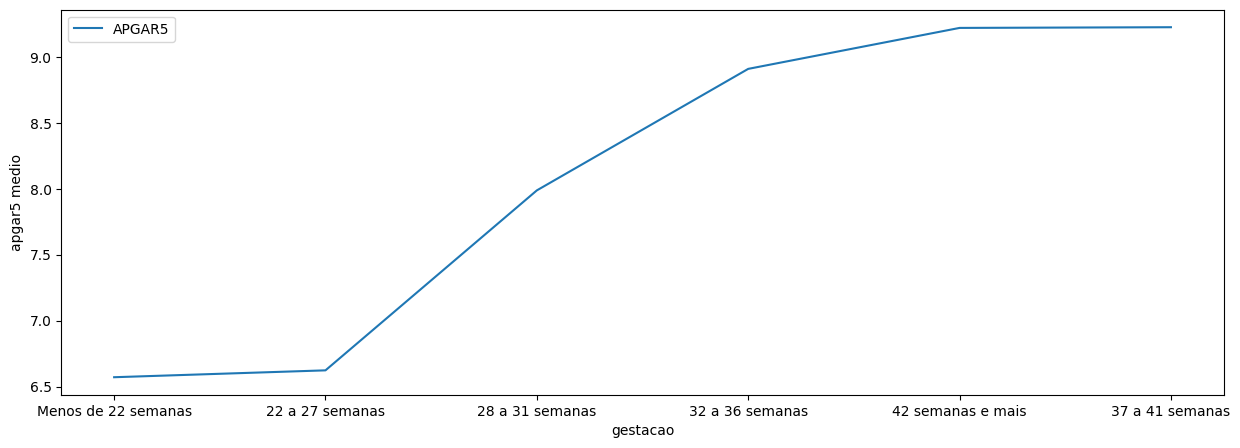

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao= 'nada'):
    if opcao == 'nada':
      pd.pivot_table(df, values= value, index= index,
                     aggfunc= func).plot(figsize= [15, 5])

    elif opcao == 'sort':
      pd.pivot_table(df, values= value, index= index,
                     aggfunc= func).sort_values(value).plot(figsize= [15, 5])

    elif opcao == 'unstack':
      pd.pivot_table(df, values= value, index= index,
                     aggfunc= func).unstack().plot(figsize= [15, 5])

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

for arg in range(1, len(sys.argv) + 1):
  sinasc = pd.read_csv('SINASC_RO_2019.csv')
  print('Data minima :', sinasc.DTNASC.min())
  print('Data maxima :', sinasc.DTNASC.max())

  max_data= sinasc.DTNASC.max()[:7]
  print(max_data)

  os.makedirs('../output/figs/'+max_data, exist_ok=True)

  plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantiade de nascimento', 'data de nascimento')
  plt.savefig('../output/figs/media  idade mae por data_' + max_data+'.png')

  plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae', 'data de nascimento', 'unstack')
  plt.savefig('../output/figs/media idade mae por sexo_' + max_data+ '.png')

  plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe', 'data de nascimento', 'unstack')
  plt.savefig('../output/figs/media peso bebe por sexo_' + max_data+ '.png')

  plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 mediano', 'gestacao', 'sort')
  plt.savefig('../output/figs/apgar1 mediano por escolaridade mae_' + max_data+ '.png')

  plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio', 'gestacao', 'sort')
  plt.savefig('../output/figs/media apgar1 por gestacao_' + max_data+ '.png')

  plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio', 'gestacao', 'sort')
  plt.savefig('../output/figs/media apgar5 gestacao_' + max_data+ '.png')